In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

In [9]:
df = pd.read_csv('<PATH_TO_DATASET>/texas_100_v2.csv')

/var/folders/8r/b322x_9x7gz4b87h7tsmh6f40000gt/T/ipykernel_47276/4234545481.py:1: DtypeWarning: Columns (2,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('<PATH_TO_DATASET>/texas_100_v2.csv')


In [14]:
df.columns

Index(['SEX_CODE', 'TYPE_OF_ADMISSION', 'SOURCE_OF_ADMISSION',
       'LENGTH_OF_STAY', 'PAT_AGE', 'PAT_STATUS', 'RACE', 'ETHNICITY',
       'TOTAL_CHARGES', 'ADMITTING_DIAGNOSIS', 'PRINC_SURG_PROC_CODE'],
      dtype='object')

In [10]:
cat_attrs = ['SEX_CODE', 'TYPE_OF_ADMISSION', 'SOURCE_OF_ADMISSION', 'PAT_STATUS', 'RACE', 'ETHNICITY', 'ADMITTING_DIAGNOSIS', 'PRINC_SURG_PROC_CODE']
df.loc[df['SEX_CODE'] == 'M', 'SEX_CODE'] = 0
df.loc[df['SEX_CODE'] == 'F', 'SEX_CODE'] = 1
df.loc[df['SEX_CODE'] == 'U', 'SEX_CODE'] = None
for col in cat_attrs:
    df = df[pd.to_numeric(df[col], errors='coerce').notnull()]
    df[col] = df[col].astype(float).astype('int64')
df.dropna(inplace=True)
for col in ['LENGTH_OF_STAY', 'PAT_AGE']:
    df[col] = df[col].astype(float).astype('int64')
df['TOTAL_CHARGES'] = df['TOTAL_CHARGES'].astype('float64')
top_k_surgery = dict(Counter(df['PRINC_SURG_PROC_CODE']))
top_k_surgery = sorted(top_k_surgery.items(), key=(lambda x: x[1]), reverse=True)[:10]
top_k_surgery = [surgery[0] for surgery in top_k_surgery]
# set top 10 surgery codes to 1, else 0
df['PRINC_SURG_PROC_CODE'] = df['PRINC_SURG_PROC_CODE'].apply(lambda x: 1 if x in top_k_surgery else 0)
df.dropna(inplace=True)
df['PRINC_SURG_PROC_CODE'] = df['PRINC_SURG_PROC_CODE'].astype('int64')

top_k_admitting_diag = dict(Counter(df['ADMITTING_DIAGNOSIS']))
top_k_admitting_diag = sorted(top_k_admitting_diag.items(), key=(lambda x: x[1]), reverse=True)[:50]
top_k_admitting_diag = [diag[0] for diag in top_k_admitting_diag]
# only keep top 50 admitting diagnosis codes
df['ADMITTING_DIAGNOSIS'] = df['ADMITTING_DIAGNOSIS'].apply(lambda x: x if x in top_k_admitting_diag else None)
df.dropna(inplace=True)

# # get thcic_id that has at least 2000 records in the dataset
# thcic_id = df['THCIC_ID'].value_counts()
# thcic_id = thcic_id[thcic_id > 3000].index.tolist()
# df = df[df['THCIC_ID'].isin(thcic_id)]

# drop thcic_id column
df = df.drop(columns=['THCIC_ID'])

In [13]:
df.to_csv('<PATH_TO_DATASET>/texas_100_cleaned.csv', index=False)

<Axes: ylabel='Count'>

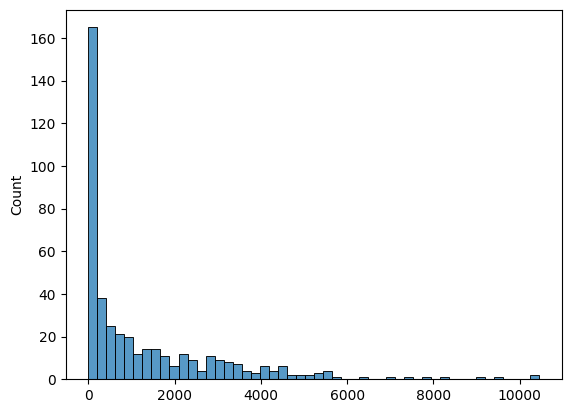

In [49]:
# draw a value count histogram for THCIC_ID to see the distribution
# do not use THCIC_ID as xticklabels
temp = df['THCIC_ID'].value_counts()
temp = temp.to_numpy()
sns.histplot(temp, bins=50)

In [12]:
df.shape

(568909, 11)

In [18]:
df[df['SEX_CODE'] == 0][['ETHNICITY', 'PRINC_SURG_PROC_CODE']].corr()

,ETHNICITY,PRINC_SURG_PROC_CODE
ETHNICITY,1.000000,0.008969
PRINC_SURG_PROC_CODE,0.008969,1.000000


In [19]:
df[df['SEX_CODE'] == 1][['ETHNICITY', 'PRINC_SURG_PROC_CODE']].corr()

,ETHNICITY,PRINC_SURG_PROC_CODE
ETHNICITY,1.000000,-0.074097
PRINC_SURG_PROC_CODE,-0.074097,1.000000


In [11]:
for col in df.columns:
    print(df[col].value_counts())

SEX_CODE
1    348932
0    219977
Name: count, dtype: int64
TYPE_OF_ADMISSION
1    270245
3    181865
2    113603
9      2088
5      1096
4        12
Name: count, dtype: int64
SOURCE_OF_ADMISSION
7    281460
1    228858
4     25915
2     15769
5     11417
6      4258
9      1122
8       100
3         5
0         5
Name: count, dtype: int64
LENGTH_OF_STAY
2      118988
3      102791
1       74597
4       59748
5       40661
        ...  
125         1
159         1
154         1
135         1
195         1
Name: count, Length: 207, dtype: int64
PAT_AGE
16    52543
15    49002
17    48610
18    46235
14    44381
19    39503
13    39160
12    33454
8     32296
9     31076
7     27670
10    27165
11    26561
20    26493
21    12895
6      8268
5      5891
4      4790
1      4589
3      3899
2      3810
0       618
Name: count, dtype: int64
PAT_STATUS
1     392424
6      55528
3      39940
62     20385
20     18077
63     14937
2       6711
4       5257
51      5048
50      4531
7       2062